## Set up

In [ ]:
!pip install -U transformers
!pip install openpyxl

ERROR: Operation cancelled by user
^C


In [16]:
# !pip install spacy-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.8/758.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.2/314.2 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 32.5 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.52.4
    Uninstalling transformers-4.52.4:
      Successfully uninstalled transformers-4.52.4


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Work from Project Folder
%cd '/content/drive/MyDrive/ColabNotebooks/EleWa'

/content/drive/MyDrive/ColabNotebooks/EleWa


In [6]:
# !pip install "transformers[torch]"

In [7]:
!pip show transformers

Name: transformers
Version: 4.52.4
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: peft, sentence-transformers, spacy-transformers


In [12]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")

ImportError: cannot import name 'pipeline' from 'transformers' (/usr/local/lib/python3.11/dist-packages/transformers/__init__.py)

In [22]:
# Load model directly
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased-finetuned-sst-2-english")
model = AutoModelForSequenceClassification.from_pretrained("distilbert/distilbert-base-uncased-finetuned-sst-2-english")

ValueError: Could not find DistilBertForSequenceClassification neither in <module 'transformers.models.distilbert' from '/usr/local/lib/python3.11/dist-packages/transformers/models/distilbert/__init__.py'> nor in <module 'transformers' from '/usr/local/lib/python3.11/dist-packages/transformers/__init__.py'>!

## Load Narratives

Load the narratives from the provided CSV file.

Load the data from the specified CSV file into a pandas DataFrame.

In [8]:
import pandas as pd

narratives_df = pd.read_csv("Meta_narratives_in_African_elections.csv")
display(narratives_df)

,Meta-Narrative,Description,Tactics Used,Common Locations,Purpose/Effect
0,Foreign Interference / Neocolonialism,Claims that Western nations manipulate electio...,"Fake reports, NGO conspiracies, doctored forei...","Mali, Burkina Faso, Senegal, Niger",Delegitimise pro-West candidates; justify junt...
1,Rigged Elections / Stolen Mandate,Accusations of widespread rigging by incumbent...,"Fake tally sheets, videos of “ballot stuffing,...","Nigeria, Ghana, Sierra Leone",Undermine confidence in the electoral process;...
2,Tech Manipulation Narratives,Suggests that biometric systems or voting tech...,"Fake tech “hacks,” rumours about foreign-manuf...","Nigeria (BVAS), Kenya",Undermine trust in digitised election systems.
3,Ethnic / Religious Polarisation,"Claims that certain groups will be targeted, m...","Deepfakes, edited quotes, emotional religious ...","Nigeria, Côte d’Ivoire, Guinea",Mobilise identity-based voting; intimidate or ...
4,Coup or Military Narratives,Elections framed as a front for military contr...,"Leaked documents, soldier testimonies, “anonym...","Mali, Burkina Faso, Guinea",Discredit elections under junta rule or imply ...
5,Divine / Prophetic Endorsements,Candidates are presented as “chosen by God” or...,"Viral prophecy videos, fake endorsements from ...","Nigeria, Ghana",Exploit religious beliefs for legitimacy or su...
6,Fake Polls and Media Clones,Spread of false public opinion data or cloned ...,"Polls with no source, doctored media logos, im...","Kenya, Nigeria, Senegal",Shape public perception; suppress opposition m...
7,Populist “Clean Outsider” Narratives,"Frame outsider candidates as incorruptible, sa...","Exaggerated life stories, viral infographics, ...","Senegal (Pastef), Nigeria (Obidients)",Fuel cult-like devotion; position candidate as...
8,Youth Disenfranchisement Claims,Narratives suggesting youth are being suppress...,"Claims of voter roll issues at campuses, “yout...","Nigeria, Ghana, Senegal",Galvanise youth movements; accuse system of ag...


###  Prepare the narratives

Format the narratives from the DataFrame into a suitable structure for the model to understand.

In [10]:
formatted_narratives = []
for index, row in narratives_df.iterrows():
    narrative_name = row['Meta-Narrative']
    description = row['Description']
    formatted_narratives.append(f"[CLS] {narrative_name}: {description} [SEP]")

print(formatted_narratives)

['[CLS] Foreign Interference / Neocolonialism: Claims that Western nations manipulate elections to install puppet leaders. [SEP]', '[CLS] Rigged Elections / Stolen Mandate: Accusations of widespread rigging by incumbents or dominant ethnic groups. [SEP]', '[CLS] Tech Manipulation Narratives: Suggests that biometric systems or voting tech are tools for fraud. [SEP]', '[CLS] Ethnic / Religious Polarisation: Claims that certain groups will be targeted, marginalised, or favoured after elections. [SEP]', '[CLS] Coup or Military Narratives: Elections framed as a front for military control or impending coups. [SEP]', '[CLS] Divine / Prophetic Endorsements: Candidates are presented as “chosen by God” or predicted to win by religious figures. [SEP]', '[CLS] Fake Polls and Media Clones: Spread of false public opinion data or cloned news sites that misreport election trends. [SEP]', '[CLS] Populist “Clean Outsider” Narratives: Frame outsider candidates as incorruptible, saviour figures. [SEP]', '

## Load the dataset

Load the provided Excel file containing tweets into a pandas DataFrame.


In [11]:
# ls

 Meta_narratives_in_African_elections.csv
'Robin_Nigeria_Election_tweets_dataset<copy>.xlsx'


In [12]:
excel_file_path = 'Robin_Nigeria_Election_tweets_dataset<copy>.xlsx'

# Load specific sheets from the Excel file
excel_data = pd.ExcelFile(excel_file_path)
tweets_df = excel_data.parse('tweets')
retweets_df = excel_data.parse('retweets')
accounts_df = excel_data.parse('accounts')

display(tweets_df.head(3))
display(retweets_df.head(3))
display(accounts_df.head(3))

,Tweet_ID,Twitter_User,RetweetedUser,Date,Retweets,Party,Tweet
0,1579533598625240064,_weyimi,davosala,2022-10-10,10639,Labour,RT @davosala: @PeterObi on transit. As a Keke ...
1,1578291198951030016,imp213x,davosala,2022-10-07,7769,Labour,RT @davosala: @PeterObi on transit. As a Keke ...
2,1575938681676110080,urchilla01,GovWike,2022-09-30,5449,APC,RT @GovWike: It was nice hosting my brother @P...


,Twitter Users,Retweet username
0,_weyimi,davosala
1,imp213x,davosala
2,urchilla01,GovWike


,Twitter Users,Followers,Full name,Location,Profile Image,Party,Tweet
0,davosala,1,NaN,NaN,NaN,NaN,RT @davosala: @PeterObi on transit. As a Keke ...
1,GovWike,1,NaN,NaN,NaN,NaN,RT @GovWike: It was nice hosting my brother @P...
2,NgLabour,1,NaN,NaN,NaN,NaN,RT @NgLabour: Your PVC is your Power. Have you...


## Preprocess the text data

Clean and preprocess the text data in the dataset (e.g., handle missing values, remove special characters, normalize text).


In [15]:
# 1. Inspect the tweets_df DataFrame to identify the column containing the text data
print(tweets_df.info())

# Identify the text column - based on the head output, it seems to be 'Tweet'
text_column = 'Tweet'

# 2. Handle any missing values in the text column
# Option 1: Remove rows with missing text
# tweets_df.dropna(subset=[text_column], inplace=True)

# Option 2: Replace missing values with an empty string
tweets_df[text_column].fillna('', inplace=True)

print(f"nMissing values in '{text_column}' after handling: {tweets_df[text_column].isnull().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Tweet_ID       69 non-null     int64         
 1   Twitter_User   69 non-null     object        
 2   RetweetedUser  69 non-null     object        
 3   Date           69 non-null     datetime64[ns]
 4   Retweets       69 non-null     int64         
 5   Party          69 non-null     object        
 6   Tweet          69 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 3.9+ KB
None
nMissing values in 'Tweet' after handling: 0


<ipython-input-15-2148083124>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tweets_df[text_column].fillna('', inplace=True)


**Reasoning**:
Add a text cleaning function and apply it to the text column of the DataFrame to create a new cleaned text column. (`cleanTweet`)



In [16]:
import re

def clean_text(text):
    """
    Cleans the input text by removing URLs, mentions, hashtags, punctuation,
    and converting text to lowercase.
    """
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove mentions (@...)
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags (#...)
    text = re.sub(r'#\w+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# 4. Apply the cleaning function to the text column
tweets_df['cleanTweet'] = tweets_df[text_column].apply(clean_text)

# Display the original and cleaned tweets
display(tweets_df[[text_column, 'cleanTweet']].head())

,Tweet,cleanTweet
0,RT @davosala: @PeterObi on transit. As a Keke ...,rt on transit as a keke rider i carry more t...
1,RT @davosala: @PeterObi on transit. As a Keke ...,rt on transit as a keke rider i carry more t...
2,RT @GovWike: It was nice hosting my brother @P...,rt it was nice hosting my brother once again
3,RT @NgLabour: Your PVC is your Power. Have you...,rt your pvc is your power have you gotten it ...
4,"RT @rosenthal_jon: Oh dear, it is never a good...",rt oh dear it is never a good sign in a presi...


## Classify narratives

Apply the existing narrative classification pipeline to each tweet/post in the dataset to identify the relevant narratives.


In [19]:
# Re-load the model and tokenizer for narrative classification
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)


def classify_tweet_narratives(tweet, formatted_narratives, tokenizer, model):
    """
    Classifies a tweet based on provided election-related narratives.

    Args:
        tweet: A string representing the tweet.
        formatted_narratives: A list of formatted narrative strings.
        tokenizer: The loaded tokenizer.
        model: The loaded pre-trained model.

    Returns:
        A list of predicted narrative categories.
    """
    predicted_categories = []
    for narrative in formatted_narratives:
        # Combine the tweet and narrative for the model
        combined_input = f"[CLS] {tweet} [SEP] {narrative}"

        # Tokenize the combined input
        inputs = tokenizer(combined_input, return_tensors="pt", padding=True, truncation=True, max_length=512)

        # Get model predictions
        with torch.no_grad():
            outputs = model(**inputs)

        # Apply softmax to get probabilities
        probabilities = torch.softmax(outputs.logits, dim=1)

        # Assuming a binary classification output (e.g., [probability of not relevant, probability of relevant])
        # We are interested in the probability of the second class (relevant)
        relevance_probability = probabilities[:, 1].item()

        # Determine if the narrative is predicted for the tweet based on a threshold
        threshold = 0.5  # Example threshold
        if relevance_probability > threshold:
            # Extract the narrative name from the formatted string
            narrative_name = narrative.replace("[CLS] ", "").split(":")[0]
            predicted_categories.append(narrative_name.strip())

    return predicted_categories

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Classify texts


Iterate through the DataFrame, classify each tweet using the defined function, and store the results in a new column.



In [20]:
tweets_df['Predicted_Narratives'] = tweets_df['cleanTweet'].apply(
    lambda tweet: classify_tweet_narratives(tweet, formatted_narratives, tokenizer, model)
)

display(tweets_df[['cleanTweet', 'Predicted_Narratives']].head())

NameError: name 'torch' is not defined

In [ ]:
# tweets_df.head(2)

## Extract actors


Identify and extract named entities (potential actors) from the text data.


In [21]:
def extract_entities(text):
    """
    Extracts named entities from the input text using the NER pipeline.
    """
    if pd.isna(text):
        return []
    entities = ner_pipeline(text)
    # Extract only the entity text and type
    extracted_list = [{'entity': entity['word'], 'type': entity['entity_group']} for entity in entities]
    return extracted_list

# Apply the function to the 'Cleaned Tweet' column
tweets_df['Extracted_Actors'] = tweets_df['cleanTweet'].apply(extract_entities)

# Display the first few rows with relevant columns
display(tweets_df[['cleanTweet', 'Extracted_Actors']].head())

,cleanTweet,Extracted_Actors
0,rt on transit as a keke rider i carry more t...,[]
1,rt on transit as a keke rider i carry more t...,[]
2,rt it was nice hosting my brother once again,[]
3,rt your pvc is your power have you gotten it ...,[]
4,rt oh dear it is never a good sign in a presi...,[]


In [26]:
tweets_df.Extracted_Actors[65]

[{'entity': 'as', 'type': 'PER'}]

## Timelines, Insights and Analysis

Analyze patterns of the extracted narratives to identify periods of increased discussion or the emergence of new narratives.


In [ ]:
# formatted_narratives


['[CLS] Foreign Interference / Neocolonialism: Claims that Western nations manipulate elections to install puppet leaders. [SEP]',
 '[CLS] Rigged Elections / Stolen Mandate: Accusations of widespread rigging by incumbents or dominant ethnic groups. [SEP]',
 '[CLS] Tech Manipulation Narratives: Suggests that biometric systems or voting tech are tools for fraud. [SEP]',
 '[CLS] Ethnic / Religious Polarisation: Claims that certain groups will be targeted, marginalised, or favoured after elections. [SEP]',
 '[CLS] Coup or Military Narratives: Elections framed as a front for military control or impending coups. [SEP]',
 '[CLS] Divine / Prophetic Endorsements: Candidates are presented as “chosen by God” or predicted to win by religious figures. [SEP]',
 '[CLS] Fake Polls and Media Clones: Spread of false public opinion data or cloned news sites that misreport election trends. [SEP]',
 '[CLS] Populist “Clean Outsider” Narratives: Frame outsider candidates as incorruptible, saviour figures. [S

In [ ]:
import torch
import pandas as pd
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import re
from collections import defaultdict

# 1. Re-load the narrative definitions from the CSV file and format them
try:
    narratives_df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/EleWa/Meta_narratives_in_African_elections.csv")
    formatted_narratives = []
    if not narratives_df.empty:
        for index, row in narratives_df.iterrows():
            narrative_name = row['Meta-Narrative']
            description = row['Description']
            formatted_narratives.append(f"[CLS] {narrative_name}: {description} [SEP]")
        print(f"Successfully loaded and formatted {len(formatted_narratives)} narratives.")
    else:
        print("Narratives DataFrame is empty after loading.")
        formatted_narratives = [] # Ensure it's explicitly empty if loading fails

except FileNotFoundError:
    print("Error: Narrative CSV file not found. Please ensure 'Meta_narratives_in_African_elections.csv' is in the specified path.")
    narratives_df = pd.DataFrame() # Create an empty DataFrame to avoid further errors
    formatted_narratives = [] # Ensure it's explicitly empty

# 2. Re-load the model and tokenizer for narrative classification
model_name = "distilbert-base-uncased"
try:
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name)
    print(f"Successfully loaded model: {model_name}")
except Exception as e:
    print(f"Error loading model or tokenizer: {e}")
    tokenizer = None
    model = None


# 3. Define the classify_tweet_narratives function
def classify_tweet_narratives(tweet, formatted_narratives, tokenizer, model):
    """
    Classifies a tweet based on provided election-related narratives.

    Args:
        tweet: A string representing the tweet.
        formatted_narratives: A list of formatted narrative strings.
        tokenizer: The loaded tokenizer.
        model: The loaded pre-trained model.

    Returns:
        A list of predicted narrative categories.
    """
    if tokenizer is None or model is None or not formatted_narratives:
        return []

    predicted_categories = []
    for narrative in formatted_narratives:
        # Combine the tweet and narrative for the model
        combined_input = f"[CLS] {tweet} [SEP] {narrative}"

        # Tokenize the combined input
        inputs = tokenizer(combined_input, return_tensors="pt", padding=True, truncation=True, max_length=512)

        # Get model predictions
        with torch.no_grad():
            try:
                outputs = model(**inputs)
            except Exception as e:
                print(f"Error during model prediction for narrative '{narrative}': {e}")
                continue

        # Apply softmax to get probabilities
        probabilities = torch.softmax(outputs.logits, dim=1)

        # Assuming a binary classification output (e.g., [probability of not relevant, probability of relevant])
        # We are interested in the probability of the second class (relevant)
        # Check if logits has enough columns before accessing index 1
        if outputs.logits.shape[1] > 1:
            relevance_probability = probabilities[:, 1].item()
        else:
            # If the model only outputs one class, we cannot perform binary classification as intended.
            # This might indicate an issue with the model or task setup.
            print(f"Warning: Model output has only one logit ({outputs.logits.shape[1]}). Cannot perform binary classification for narrative '{narrative}'.")
            continue # Skip this narrative


        # Determine if the narrative is predicted for the tweet based on a threshold
        threshold = 0.5  # Example threshold
        if relevance_probability > threshold:
            # Extract the narrative name from the formatted string
            narrative_name = narrative.replace("[CLS] ", "").split(":")[0]
            predicted_categories.append(narrative_name.strip())

    return predicted_categories

# 4. Ensure the 'Cleaned Tweet' column exists by re-cleaning if necessary
if 'Cleaned Tweet' not in tweets_df.columns:
     def clean_text(text):
        if pd.isna(text):
            return ""
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        text = re.sub(r'@\w+', '', text)
        text = re.sub(r'#\w+', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        text = text.lower()
        return text
     tweets_df['Cleaned Tweet'] = tweets_df['Tweet'].apply(clean_text)
     print("Created 'Cleaned Tweet' column.")
else:
    print("'Cleaned Tweet' column already exists.")


# 5. Apply the narrative classification function to the 'Cleaned Tweet' column
if tokenizer is not None and model is not None and formatted_narratives:
    print("Starting narrative classification...")
    # Apply the classification function to each cleaned tweet
    tweets_df['Predicted Narratives'] = tweets_df['Cleaned Tweet'].apply(
        lambda tweet: classify_tweet_narratives(tweet, formatted_narratives, tokenizer, model)
    )
    print("Narrative classification completed.")
else:
     print("Skipping narrative classification due to previous errors or empty narratives list.")
     # Ensure the column exists even if classification is skipped
     if 'Predicted Narratives' not in tweets_df.columns:
         tweets_df['Predicted Narratives'] = [[]] * len(tweets_df)


# 6. Initialize a dictionary to store narrative counts per day
narrative_daily_counts = defaultdict(lambda: defaultdict(int))

# Check if 'Day of Time' column exists and is in datetime format
if 'Date' in tweets_df.columns and pd.api.types.is_datetime64_any_dtype(tweets_df['Day of Time']):
    # Iterate through each tweet
    print("Aggregating daily narrative counts...")
    for index, row in tweets_df.iterrows():
        tweet_date = row['Date'].date() # Extract date
        predicted_narratives = row['Predicted Narratives']

        # For each predicted narrative in the tweet, increment the count for that date
        for narrative in predicted_narratives:
            narrative_daily_counts[narrative][tweet_date] += 1
    print("Daily narrative counts aggregated.")
else:
    print("Error: 'Date' column not found or not in datetime format. Cannot perform temporal analysis.")


# 7. Convert the nested dictionary to a pandas DataFrame for easier analysis
narrative_temporal_df = pd.DataFrame.from_dict(narrative_daily_counts, orient='index').transpose().fillna(0)

# 8. Sort by date
narrative_temporal_df.sort_index(inplace=True)

# 9. Analyze for peaks (periods of increased discussion)
print("\nNarrative Temporal Analysis - Peaks:")
if not narrative_temporal_df.empty:
    for narrative in narrative_temporal_df.columns:
        if narrative_temporal_df[narrative].sum() > 0:
            max_count_date = narrative_temporal_df[narrative].idxmax()
            max_count = narrative_temporal_df[narrative].max()
            print(f"- '{narrative}': Peak activity of {int(max_count)} occurrences on {max_count_date.strftime('%Y-%m-%d')}")
        else:
            print(f"- '{narrative}': No activity recorded.")
else:
    print("Narrative temporal DataFrame is empty. Cannot analyze peaks.")


# 10. Analyze for emergence dates (first occurrence)
print("\nNarrative Temporal Analysis - Emergence Dates:")
if not narrative_temporal_df.empty:
    for narrative in narrative_temporal_df.columns:
         if narrative_temporal_df[narrative].sum() > 0:
            # Find the first date where the count is greater than 0
            emergence_date = narrative_temporal_df[narrative][narrative_temporal_df[narrative] > 0].index.min()
            if pd.notna(emergence_date):
                print(f"- '{narrative}': First occurrence on {emergence_date.strftime('%Y-%m-%d')}")
            else:
                print(f"- '{narrative}': No occurrence recorded with count > 0.")
         else:
            print(f"- '{narrative}': No activity recorded.")
else:
    print("Narrative DataFrame is empty. Cannot analyze emergence dates.")


# 11. Display the narrative temporal DataFrame
print("\nNarrative DataFrame (Daily Counts):")
display(narrative_temporal_df)

Successfully loaded and formatted 9 narratives.


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Successfully loaded model: distilbert-base-uncased
'Cleaned Tweet' column already exists.
Starting narrative classification...
Narrative classification completed.
Aggregating daily narrative counts...
Daily narrative counts aggregated.

Narrative Temporal Analysis - Peaks:
- 'Foreign Interference / Neocolonialism': Peak activity of 8 occurrences on 2022-09-30
- 'Rigged Elections / Stolen Mandate': Peak activity of 10 occurrences on 2022-09-30
- 'Tech Manipulation Narratives': Peak activity of 8 occurrences on 2022-09-30
- 'Ethnic / Religious Polarisation': Peak activity of 9 occurrences on 2022-09-30
- 'Coup or Military Narratives': Peak activity of 8 occurrences on 2022-09-30
- 'Divine / Prophetic Endorsements': Peak activity of 10 occurrences on 2022-09-30
- 'Fake Polls and Media Clones': Peak activity of 8 occurrences on 2022-09-30
- 'Populist “Clean Outsider” Narratives': Peak activity of 8 occurrences on 2022-09-30
- 'Youth Disenfranchisement Claims': Peak activity of 6 occurrence

,Foreign Interference / Neocolonialism,Rigged Elections / Stolen Mandate,Tech Manipulation Narratives,Ethnic / Religious Polarisation,Coup or Military Narratives,Divine / Prophetic Endorsements,Fake Polls and Media Clones,Populist “Clean Outsider” Narratives,Youth Disenfranchisement Claims
2022-09-30,8.0,10.0,8.0,9.0,8.0,10.0,8.0,8.0,6.0
2022-10-01,7.0,8.0,7.0,7.0,4.0,8.0,7.0,7.0,4.0
2022-10-02,2.0,2.0,1.0,2.0,0.0,2.0,2.0,1.0,0.0
2022-10-03,2.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,1.0
2022-10-04,2.0,3.0,1.0,3.0,1.0,4.0,3.0,2.0,1.0
2022-10-05,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2022-10-06,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0
2022-10-07,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2022-10-08,2.0,4.0,3.0,4.0,2.0,5.0,4.0,2.0,2.0
2022-10-09,0.0,3.0,0.0,1.0,0.0,3.0,2.0,1.0,0.0


In [28]:
narrative_temporal_df

,Foreign Interference / Neocolonialism,Rigged Elections / Stolen Mandate,Tech Manipulation Narratives,Ethnic / Religious Polarisation,Coup or Military Narratives,Divine / Prophetic Endorsements,Fake Polls and Media Clones,Populist “Clean Outsider” Narratives,Youth Disenfranchisement Claims
2022-09-30,11,11,11,11,11,11,11,11,11
2022-10-01,8,8,8,8,8,8,8,8,8
2022-10-02,2,2,2,2,2,2,2,2,2
2022-10-03,5,5,5,5,5,5,5,5,5
2022-10-04,4,4,4,4,4,4,4,4,4
2022-10-05,2,2,2,2,2,2,2,2,2
2022-10-06,4,4,4,4,4,4,4,4,4
2022-10-07,1,1,1,1,1,1,1,1,1
2022-10-08,5,5,5,5,5,5,5,5,5
2022-10-09,3,3,3,3,3,3,3,3,3


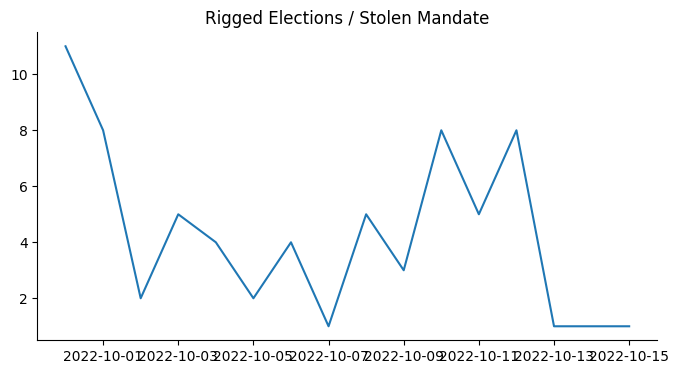

In [33]:
# @title Rigged Elections / Stolen Mandate

from matplotlib import pyplot as plt
narrative_temporal_df['Rigged Elections / Stolen Mandate'].plot(kind='line', figsize=(8, 4), title='Rigged Elections / Stolen Mandate')
plt.gca().spines[['top', 'right']].set_visible(False)

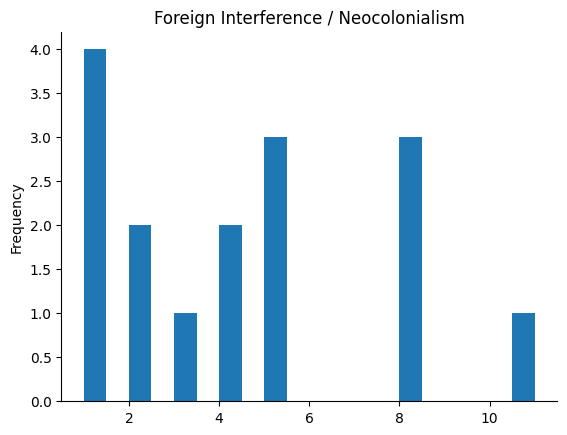

In [32]:
from matplotlib import pyplot as plt
narrative_temporal_df['Foreign Interference / Neocolonialism'].plot(kind='hist', bins=20, title='Foreign Interference / Neocolonialism')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
from transformers import pipeline

# Create a NER pipeline
# Using a suitable pre-trained model (e.g., "dslim/bert-base-NER")
ner_pipeline = pipeline("ner", model="dslim/bert-base-NER", grouped_entities=True)

config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


## Identify Connections/Associations

Identify relationships and connections between extracted actors, classified narratives, and temporal information to understand the network of influence and information flow.

In [22]:
from transformers import pipeline
import pandas as pd
import re
import torch
from collections import defaultdict

# Ensure the 'Cleaned Tweet' column exists by re-cleaning if necessary
if 'Cleaned Tweet' not in tweets_df.columns:
     def clean_text(text):
        if pd.isna(text):
            return ""
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        text = re.sub(r'@\w+', '', text)
        text = re.sub(r'#\w+', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        text = text.lower()
        return text
     tweets_df['Cleaned Tweet'] = tweets_df['Tweet'].apply(clean_text)
     print("Created 'Cleaned Tweet' column.")
else:
    print("'Cleaned Tweet' column already exists.")


# Re-run Actor Extraction (NER)
# Create a named entity recognition (NER) pipeline
# Using a suitable pre-trained model (e.g., "dslim/bert-base-NER")
# Ensure the model is loaded only once if possible
if 'ner_pipeline' not in locals():
    try:
        ner_pipeline = pipeline("ner", model="dslim/bert-base-NER", grouped_entities=True)
        print("Successfully loaded NER pipeline.")
    except Exception as e:
        print(f"Error loading NER pipeline: {e}")
        ner_pipeline = None

def extract_entities(text):
    """
    Extracts named entities from the input text using the NER pipeline.
    """
    if ner_pipeline is None or pd.isna(text):
        return []
    try:
        entities = ner_pipeline(text)
        # Extract only the entity text and type
        extracted_list = [{'entity': entity['word'], 'type': entity['entity_group']} for entity in entities]
        return extracted_list
    except Exception as e:
        print(f"Error during entity extraction for text: {text[:50]}... Error: {e}")
        return []


# Apply the function to the 'Cleaned Tweet' column
if ner_pipeline is not None:
    print("Starting actor extraction...")
    tweets_df['Extracted Actors'] = tweets_df['Cleaned Tweet'].apply(extract_entities)
    print("Actor extraction completed.")
else:
    print("Skipping actor extraction due to NER pipeline loading error.")
    if 'Extracted Actors' not in tweets_df.columns:
        tweets_df['Extracted Actors'] = [[]] * len(tweets_df)


# Re-run Narrative Classification
# Load the narratives from the CSV and format them
narrative_csv_path = "/content/drive/MyDrive/ColabNotebooks/EleWa/Meta_narratives_in_African_elections.csv"
try:
    narratives_df = pd.read_csv(narrative_csv_path)
    formatted_narratives = []
    if not narratives_df.empty:
        for index, row in narratives_df.iterrows():
            narrative_name = row['Meta-Narrative']
            description = row['Description']
            formatted_narratives.append(f"[CLS] {narrative_name}: {description} [SEP]")
        print(f"Successfully loaded and formatted {len(formatted_narratives)} narratives from {narrative_csv_path}")
    else:
        print(f"Narratives DataFrame is empty after loading from {narrative_csv_path}.")
        formatted_narratives = []

except FileNotFoundError:
    print(f"Error: Narrative CSV file not found at {narrative_csv_path}. Please ensure the path is correct.")
    narratives_df = pd.DataFrame()
    formatted_narratives = []

# Re-load the model and tokenizer for narrative classification
model_name = "distilbert-base-uncased"
if 'tokenizer' not in locals() or 'model' not in locals():
    try:
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        model = AutoModelForSequenceClassification.from_pretrained(model_name)
        print(f"Successfully loaded model: {model_name}")
    except Exception as e:
        print(f"Error loading model or tokenizer: {e}")
        tokenizer = None
        model = None

def classify_tweet_narratives(tweet, formatted_narratives, tokenizer, model):
    """
    Classifies a tweet based on provided election-related narratives.

    Args:
        tweet: A string representing the tweet.
        formatted_narratives: A list of formatted narrative strings.
        tokenizer: The loaded tokenizer.
        model: The loaded pre-trained model.

    Returns:
        A list of predicted narrative categories.
    """
    if tokenizer is None or model is None or not formatted_narratives:
        return []

    predicted_categories = []
    for narrative in formatted_narratives:
        combined_input = f"[CLS] {tweet} [SEP] {narrative}"
        inputs = tokenizer(combined_input, return_tensors="pt", padding=True, truncation=True, max_length=512)

        with torch.no_grad():
            try:
                outputs = model(**inputs)
            except Exception as e:
                print(f"Error during model prediction for narrative '{narrative}': {e}")
                continue

        probabilities = torch.softmax(outputs.logits, dim=1)

        if outputs.logits.shape[1] > 1:
            relevance_probability = probabilities[:, 1].item()
        else:
            # print(f"Warning: Model output has only one logit ({outputs.logits.shape[1]}). Cannot perform binary classification for narrative '{narrative}'.")
            continue

        threshold = 0.5
        if relevance_probability > threshold:
            narrative_name = narrative.replace("[CLS] ", "").split(":")[0]
            predicted_categories.append(narrative_name.strip())

    return predicted_categories

# Apply the narrative classification function to the 'Cleaned Tweet' column
if tokenizer is not None and model is not None and formatted_narratives:
    print("Starting narrative classification...")
    tweets_df['Predicted Narratives'] = tweets_df['Cleaned Tweet'].apply(
        lambda tweet: classify_tweet_narratives(tweet, formatted_narratives, tokenizer, model)
    )
    print("Narrative classification completed.")
else:
     print("Skipping narrative classification due to previous errors or empty narratives list.")
     if 'Predicted Narratives' not in tweets_df.columns:
         tweets_df['Predicted Narratives'] = [[]] * len(tweets_df)


# Re-run Temporal Extraction (if needed for connections)
# This step was confirmed to be working previously, but including it here
# to ensure all necessary columns are present before identifying connections.
def extract_timelines(text):
    """
    Extracts temporal information (dates, times, events) from the input text.
    (Using simplified regex for now)
    """
    if pd.isna(text):
        return []

    temporal_info = []

    # Basic regex for common date formats (MM/DD/YYYY, YYYY-MM-DD, DD-MM-YYYY, etc.)
    date_patterns = [
        r'\d{1,2}/\d{1,2}/\d{2,4}',
        r'\d{4}-\d{1,2}-\d{1,2}',
        r'\d{1,2}-\d{1,2}-\d{4}',
        r'\b(?:Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)\s+\d{1,2}(?:,\s*\d{4})?\b',
        r'\d{1,2}\s+(?:Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)(?:,\s*\d{4})?\b'
    ]

    # Basic regex for common time formats (HH:MM, HH:MM:SS, HH AM/PM)
    time_patterns = [
        r'\d{1,2}:\d{2}(?::\d{2})?(?:\s?(?:AM|PM))?'
    ]

    # Combine patterns
    all_patterns = date_patterns + time_patterns

    for pattern in all_patterns:
        matches = re.findall(pattern, text, re.IGNORECASE)
        temporal_info.extend(matches)


    return list(set(temporal_info)) # Return unique findings

# Apply the function to the 'Cleaned Tweet' column
if 'Extracted Timelines' not in tweets_df.columns:
    print("Starting temporal information extraction...")
    tweets_df['Extracted Timelines'] = tweets_df['Cleaned Tweet'].apply(extract_timelines)
    print("Temporal information extraction completed.")
else:
    print("'Extracted Timelines' column already exists.")


# Now, identify connections/associations based on co-occurrence
def identify_connections(row):
    """
    Identifies connections between extracted actors, narratives, and timelines
    within a single tweet based on co-occurrence.
    """
    connections = []
    # Ensure the columns exist before accessing them, use .get() for safer access
    tweet_id = row.get('Tweet ID')
    actors = [entity['entity'] for entity in row.get('Extracted Actors', [])]
    narratives = row.get('Predicted Narratives', [])
    timelines = row.get('Extracted Timelines', [])


    # Find co-occurrences
    # Connections between actors and narratives
    for actor in actors:
        for narrative in narratives:
             # Include tweet_id in connections for traceability
            connections.append({'source': actor, 'target': narrative, 'type': 'actor-narrative', 'tweet_id': tweet_id})

    # Connections between actors and timelines
    for actor in actors:
        for timeline in timelines:
             # Include tweet_id in connections for traceability
            connections.append({'source': actor, 'target': timeline, 'type': 'actor-timeline', 'tweet_id': tweet_id})

    # Connections between narratives and timelines
    for narrative in narratives:
        for timeline in timelines:
             # Include tweet_id in connections for traceability
            connections.append({'source': narrative, 'target': timeline, 'type': 'narrative-timeline', 'tweet_id': tweet_id})

    # Add connections based on retweets
    # This part requires linking retweets back to the original tweet or actor.
    # Using 'RetweetUser' from tweets_df as a proxy for the original author of a retweeted tweet
    if 'RetweetUser' in row and pd.notna(row['RetweetUser']) and tweet_id is not None:
         # Find the retweeter(s) for this tweet ID from the retweets_df
         # Ensure 'Tweet ID' column exists in retweets_df and filter
         if 'Tweet ID' in retweets_df.columns:
             retweeters_for_tweet = retweets_df[retweets_df['Tweet ID'] == tweet_id]['Twitter Users'].tolist()
             original_author = row['RetweetUser']
             for retweeter in retweeters_for_tweet:
                 if retweeter != original_author: # Avoid self-loops
                     connections.append({'source': retweeter, 'target': original_author, 'type': 'retweet', 'tweet_id': tweet_id})
         else:
             print(f"Warning: 'Tweet ID' column not found in retweets_df. Cannot add retweet connections for Tweet ID {tweet_id}.")


    return connections

# Apply the function to each row of the DataFrame to identify connections
print("Starting connection identification...")
tweets_df['Extracted Connections'] = tweets_df.apply(identify_connections, axis=1)
print("Connection identification completed.")

# Display the head of the DataFrame showing the relevant columns
display(tweets_df[['Cleaned Tweet', 'Extracted Actors', 'Predicted Narratives', 'Extracted Timelines', 'Extracted Connections']].head())

'Cleaned Tweet' column already exists.
Starting actor extraction...
Actor extraction completed.
Successfully loaded and formatted 9 narratives from /content/drive/MyDrive/ColabNotebooks/EleWa/Meta_narratives_in_African_elections.csv
Starting narrative classification...
Narrative classification completed.
'Extracted Timelines' column already exists.
Starting connection identification...
Connection identification completed.


,Cleaned Tweet,Extracted Actors,Predicted Narratives,Extracted Timelines,Extracted Connections
0,rt on transit as a keke rider i carry more t...,[],"[Foreign Interference / Neocolonialism, Rigged...",[],[]
1,rt on transit as a keke rider i carry more t...,[],"[Foreign Interference / Neocolonialism, Rigged...",[],[]
2,rt it was nice hosting my brother once again,[],"[Foreign Interference / Neocolonialism, Rigged...",[],[]
3,rt your pvc is your power have you gotten it ...,[],"[Foreign Interference / Neocolonialism, Rigged...",[],[]
4,rt oh dear it is never a good sign in a presi...,[],"[Foreign Interference / Neocolonialism, Rigged...",[],[]


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Cleaned Tweet').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

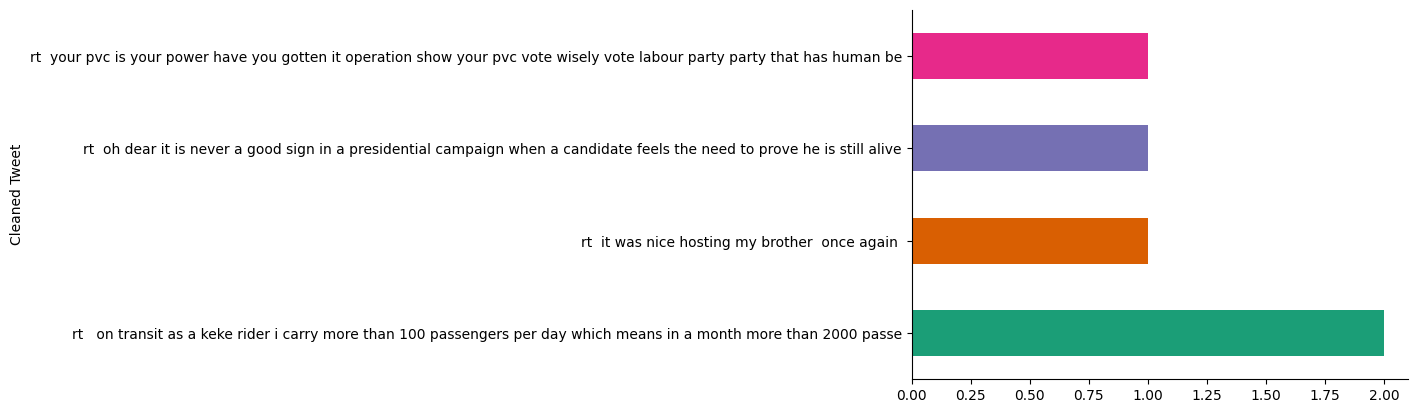

In [27]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Cleaned Tweet').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Aggregating daily narrative counts...
Daily narrative counts aggregated.


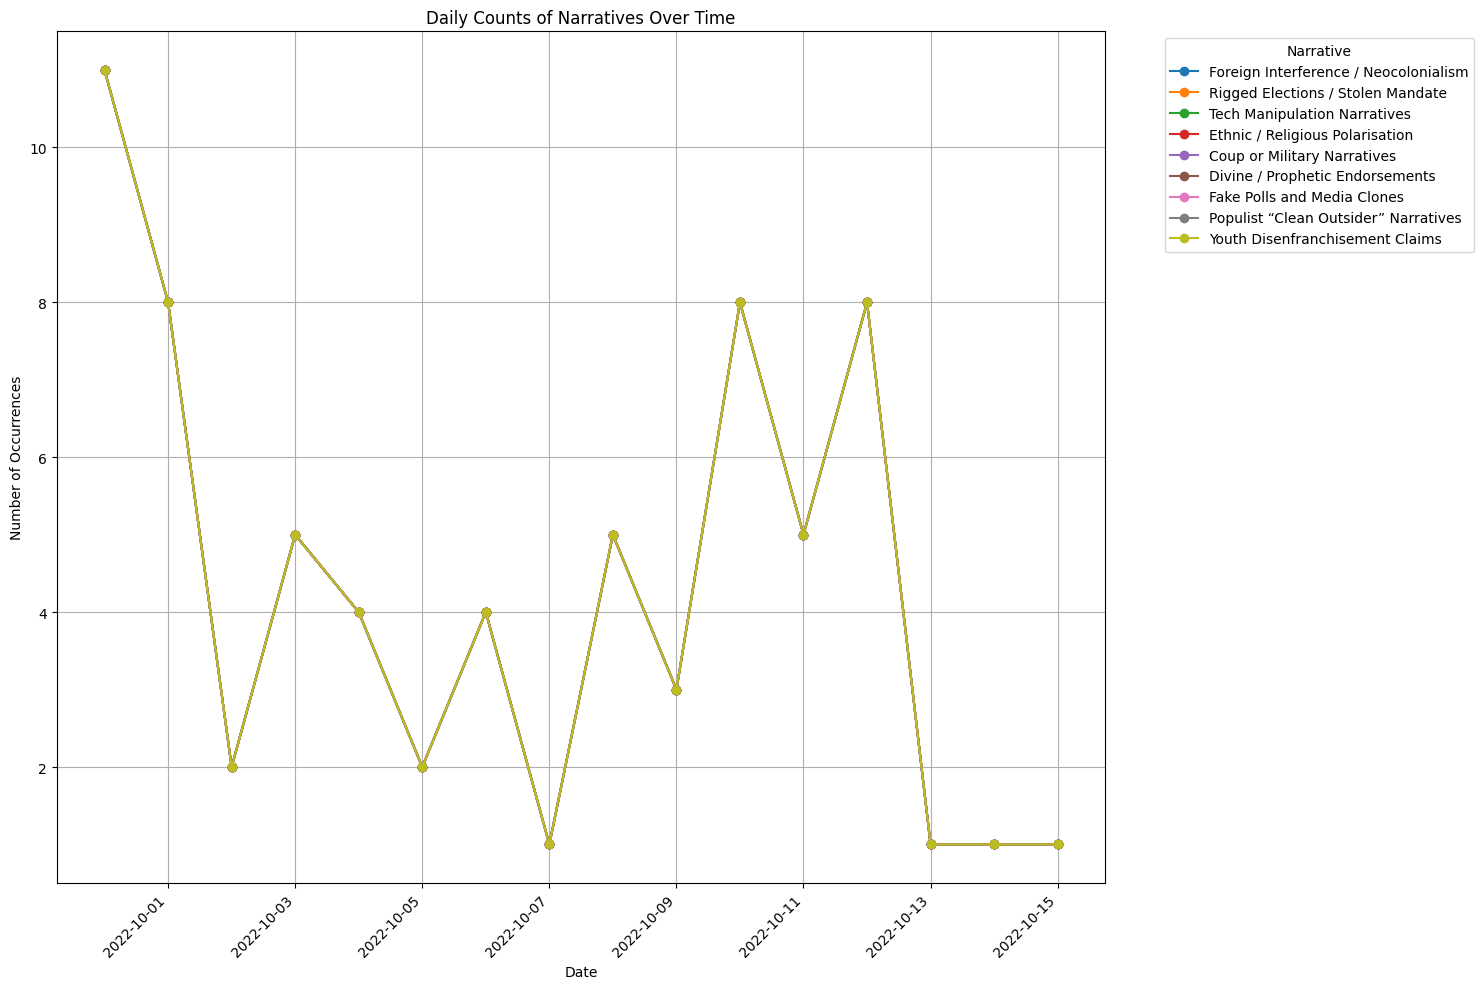

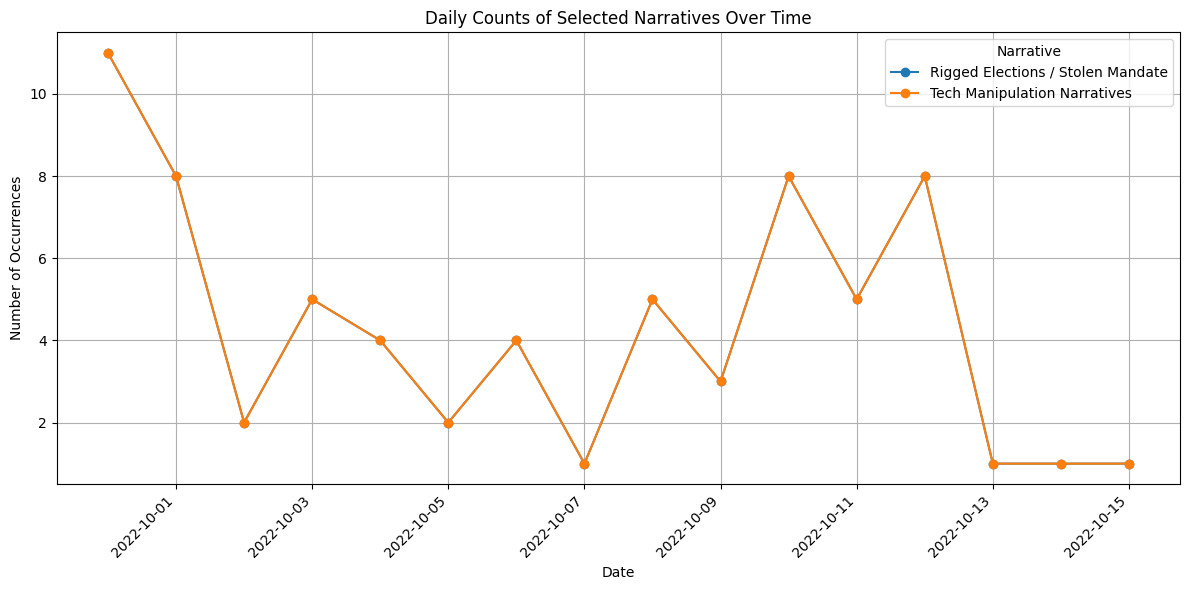

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Re-create the narrative_temporal_df
narrative_daily_counts = defaultdict(lambda: defaultdict(int))

# Check if 'Date' column exists and is in datetime format
if 'Date' in tweets_df.columns and pd.api.types.is_datetime64_any_dtype(tweets_df['Date']):
    # Iterate through each tweet
    print("Aggregating daily narrative counts...")
    for index, row in tweets_df.iterrows():
        tweet_date = row['Date'].date() # Extract date
        # Ensure 'Predicted Narratives' column exists and is a list
        predicted_narratives = row.get('Predicted Narratives', [])
        if not isinstance(predicted_narratives, list):
             # Handle cases where it might not be a list unexpectedly
             predicted_narratives = []


        # For each predicted narrative in the tweet, increment the count for that date
        for narrative in predicted_narratives:
            narrative_daily_counts[narrative][tweet_date] += 1
    print("Daily narrative counts aggregated.")
else:
    print("Error: 'Date' column not found or not in datetime format. Cannot perform temporal analysis.")


# Convert the nested dictionary to a pandas DataFrame for easier analysis
narrative_temporal_df = pd.DataFrame.from_dict(narrative_daily_counts, orient='index').transpose().fillna(0)

# Sort by date
narrative_temporal_df.sort_index(inplace=True)

# Visualize the temporal trends of each narrative
plt.figure(figsize=(15, 10))
for narrative in narrative_temporal_df.columns:
    plt.plot(narrative_temporal_df.index, narrative_temporal_df[narrative], marker='o', linestyle='-', label=narrative)

plt.title('Daily Counts of Narratives Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Narrative', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# You can also visualize specific narratives individually or in smaller groups for clarity
# Example: Visualize only "Rigged Elections / Stolen Mandate" and "Tech Manipulation Narratives"
plt.figure(figsize=(12, 6))
narratives_to_plot = ['Rigged Elections / Stolen Mandate', 'Tech Manipulation Narratives']
for narrative in narratives_to_plot:
    if narrative in narrative_temporal_df.columns:
        plt.plot(narrative_temporal_df.index, narrative_temporal_df[narrative], marker='o', linestyle='-', label=narrative)

plt.title('Daily Counts of Selected Narratives Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Narrative')
plt.grid(True)
plt.tight_layout()
plt.show()